# Kaggle ML and Data Science Survey, 2017
## Context
For the first time, Kaggle conducted an industry-wide survey to establish a comprehensive view of the state of data science and machine learning. The survey received over 16,000 responses and we learned a ton about who is working with data, what’s happening at the cutting edge of machine learning across industries, and how new data scientists can best break into the field.

To share some of the initial insights from the survey, we’ve worked with the folks from The Pudding to put together this interactive report. They’ve shared all of the kernels used in the report here.

## Content
The data includes 5 files:

* schema.csv: a CSV file with survey schema. This schema includes the questions that correspond to each column name in both the multipleChoiceResponses.csv and freeformResponses.csv.
* multipleChoiceResponses.csv: Respondents' answers to multiple choice and ranking questions. These are non-randomized and thus a single row does correspond to all of a single user's answers. 
* freeformResponses.csv: Respondents' freeform answers to Kaggle's survey questions. These responses are randomized within a column, so that reading across a single row does not give a single user's answers.
* conversionRates.csv: Currency conversion rates (to USD) as accessed from the R package "quantmod" on September 14, 2017
* RespondentTypeREADME.txt: This is a schema for decoding the responses in the "Asked" column of the schema.csv file.
Kernel Awards in November
In the month of November, we’re awarding 1000 dollars a week for code and analyses shared on this dataset via Kaggle Kernels. Read more about this month’s Kaggle Kernels Awards and help us advance the state of machine learning and data science by exploring this one of a kind dataset.

## Methodology
This survey received 16,716 usable respondents from 171 countries and territories. If a country or territory received less than 50 respondents, we grouped them into a group named “Other” for anonymity.
We excluded respondents who were flagged by our survey system as “Spam” or who did not answer the question regarding their employment status (this question was the first required question, so not answering it indicates that the respondent did not proceed past the 5th question in our survey).
Most of our respondents were found primarily through Kaggle channels, like our email list, discussion forums and social media channels.
The survey was live from August 7th to August 25th. The median response time for those who participated in the survey was 16.4 minutes. We allowed respondents to complete the survey at any time during that window.
We received salary data by first asking respondents for their day-to-day currency, and then asking them to write in either their total compensation.
We’ve provided a csv with an exchange rate to USD for you to calculate the salary in US dollars on your own.
The question was optional
Not every question was shown to every respondent. In an attempt to ask relevant questions to each respondent, we generally asked work related questions to employed data scientists and learning related questions to students. There is a column in the schema.csv file called "Asked" that describes who saw each question. You can learn more about the different segments we used in the schema.csv file and RespondentTypeREADME.txt in the data tab.
To protect the respondents’ identity, the answers to multiple choice questions have been separated into a separate data file from the open-ended responses. We do not provide a key to match up the multiple choice and free form responses. Further, the free form responses have been randomized column-wise such that the responses that appear on the same row did not necessarily come from the same survey-taker.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pylab
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [6]:
df = pd.read_csv("multipleChoiceResponses.csv", encoding="ISO-8859-1")
df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory Analysis



### 1. Gender

### Missing Values

In [7]:
len(df[pd.isnull(df.GenderSelect)])

95

### Distribution of Respondents by Gender across all countries

The proportion of males is markedly higher than that of females while the representation of other genders is very miniscule.

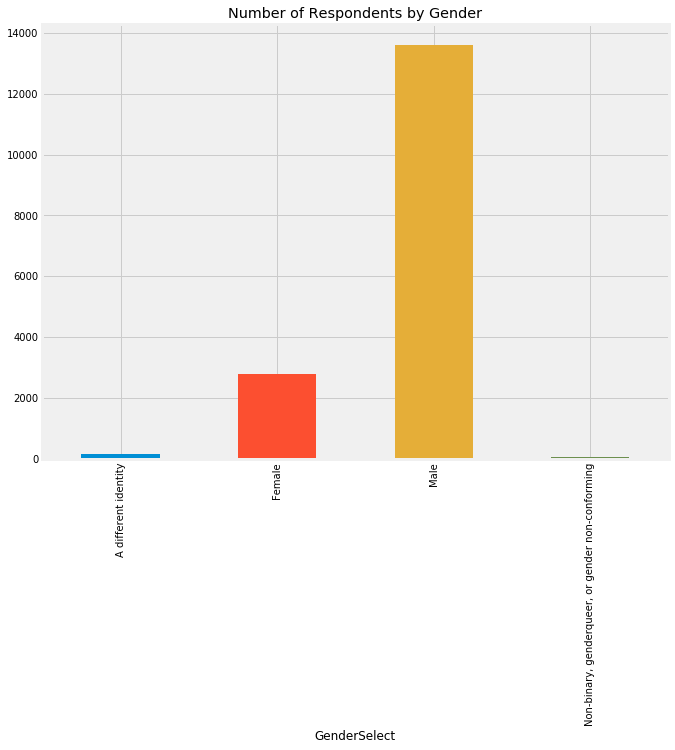

In [8]:
plot = df[df.GenderSelect.isnull() == False].groupby(df.GenderSelect).GenderSelect.count().plot.bar()
plot = plt.title("Number of Respondents by Gender")

## Which Country has the highest ratio of Female/Male Respondents

In [9]:
filtered_df = df[(df.GenderSelect.isnull() == False) & (df.Country.isnull() == False)]

In [10]:
def getFemaleMaleRatio(df):
    counts_by_gender = df.groupby('GenderSelect').GenderSelect.count()
    return counts_by_gender[0]/counts_by_gender[1]

In [11]:
group_by_country = filtered_df.groupby(df.Country)
ratios = group_by_country.apply(getFemaleMaleRatio)
print("Maximum Female/Male Ratio: ", ratios.idxmax(), ratios.max())
print("Minimum Female/Male Ratio: ", ratios.idxmin(), ratios.min())

Maximum Female/Male Ratio:  Ireland 0.46875
Minimum Female/Male Ratio:  Australia 0.012345679012345678


##  Distribution of Ages of Males and Females
The shape of the distributions of ages for both male and female are very similar although the size differs markedly. There also seem to be no women datscientists in the 60+ age bracket, while there are quite a few men in that bracket

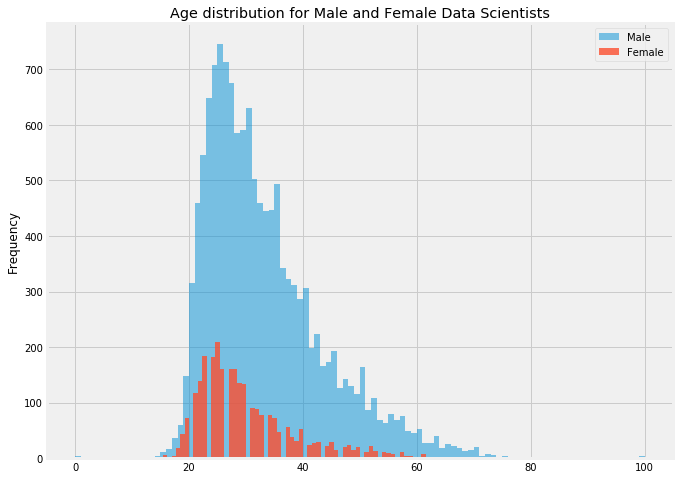

In [12]:
fig, ax = plt.subplots()
df[df.GenderSelect == 'Male'].Age.plot.hist(bins=100, ax=ax, alpha=0.5)
df[df.GenderSelect == 'Female'].Age.plot.hist(bins=100, ax=ax, alpha=0.8)
legend = ax.legend(['Male', 'Female'])
plot = plt.title("Age distribution for Male and Female Data Scientists")

## Distribution of Ages of Men and Women above 60
It might be interesting to see why there are so few women respondents above the age of 60

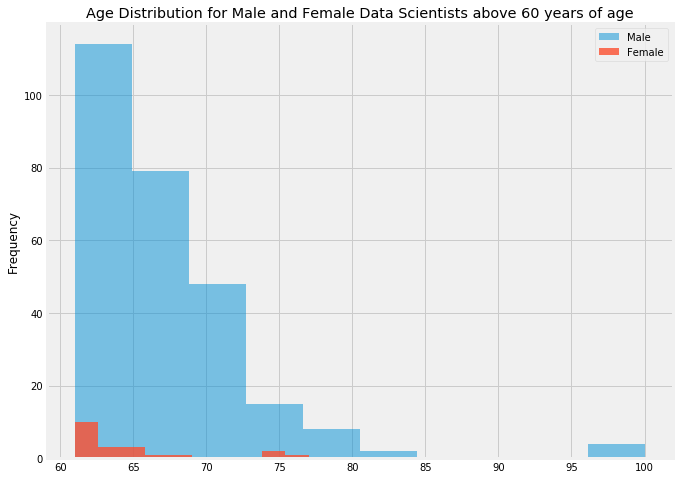

In [13]:
fig, ax = plt.subplots()
df[(df.GenderSelect == 'Male') & (df.Age > 60)].Age.plot.hist(ax=ax, alpha=0.5)
df[(df.GenderSelect == 'Female') & (df.Age > 60)].Age.plot.hist(ax=ax, alpha=0.8)
legend = ax.legend(['Male', 'Female'])
plot = plt.title("Age Distribution for Male and Female Data Scientists above 60 years of age")

## Distribution of Ages of Male & Female Students
- Again, the shapes of the distributions are similar for males and females
- However, there are no female students above the age of 38, although there are male students as old as 50 years of age 

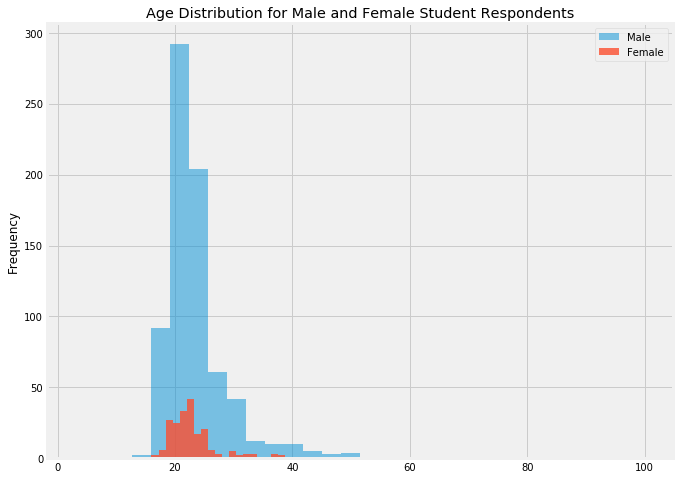

In [14]:
fig, ax = plt.subplots()
df[(df.GenderSelect == 'Male') & (df.StudentStatus == 'Yes')].Age.plot.hist(bins=30, ax=ax, alpha=0.5)
df[(df.GenderSelect == 'Female') & (df.StudentStatus == 'Yes')].Age.plot.hist(bins=30, ax=ax, alpha=0.8)
legend = ax.legend(['Male', 'Female'])
plot = plt.title("Age Distribution for Male and Female Student Respondents")

## Relationship between Employment Status and Gender
- It may not make sense to look at the absolute numbers of people here as we already know that the number of male respondents is much higher than the number of other gender respondents. 

In [15]:
counts_by_gender = df.groupby([df.GenderSelect, df.EmploymentStatus]).size().reset_index(name="Total")

In [16]:
n_male = len(df[df.GenderSelect == "Male"])
n_female = len(df[df.GenderSelect == "Female"])
n_diff_identity = len(df[df.GenderSelect == "A different identity"])
n_other = len(df[df.GenderSelect == "Non-binary, genderqueer, or gender non-conforming"])
print(n_male, n_female, n_diff_identity, n_other)

13610 2778 159 74


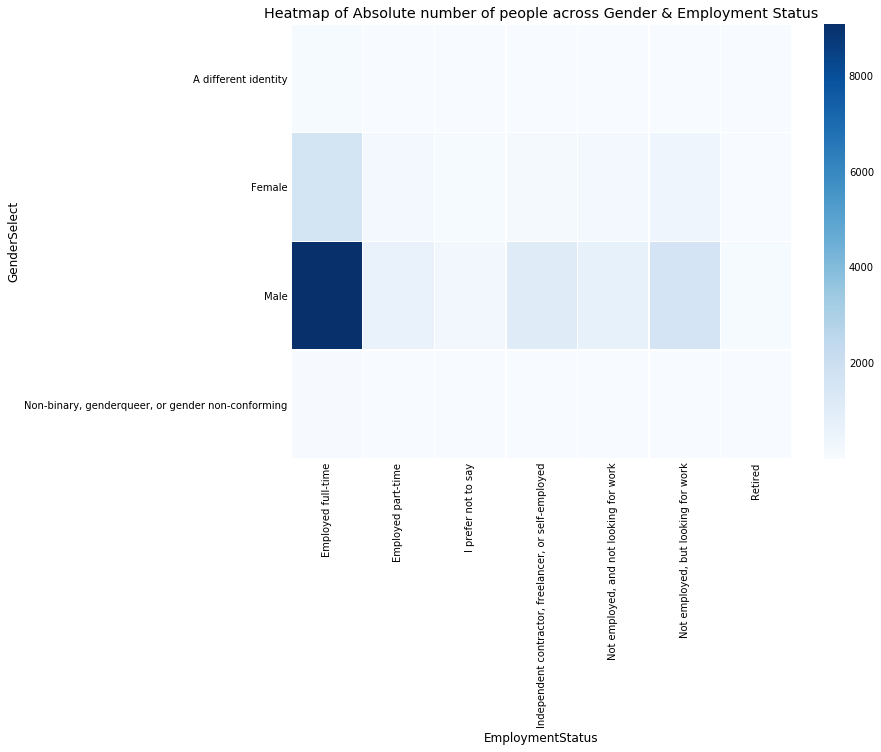

In [17]:
counts_by_gender_plot = counts_by_gender.pivot("GenderSelect", "EmploymentStatus", "Total")
ax = sns.heatmap(counts_by_gender_plot, linewidths=.5, cmap="Blues")
plot = plt.title("Heatmap of Absolute number of people across Gender & Employment Status")

## Relative number of People (within their gender group) across Different Employment Statuses
- Note: The proportions here are calculated across each gender(each row)
- It seems like the major proportion of people(looks like around 60%) across all genders are Employed full-time. 
- Their is a *slightly* higher proportion of Women who are in the "Currently Employed and Looking for Work" bracket as compared to other Gender groups
- Reference: https://stackoverflow.com/questions/23377108/pandas-percentage-of-total-with-groupby

In [18]:
relative_counts = df.groupby([df.GenderSelect, df.EmploymentStatus]).size().groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum())).reset_index(name="percentage")

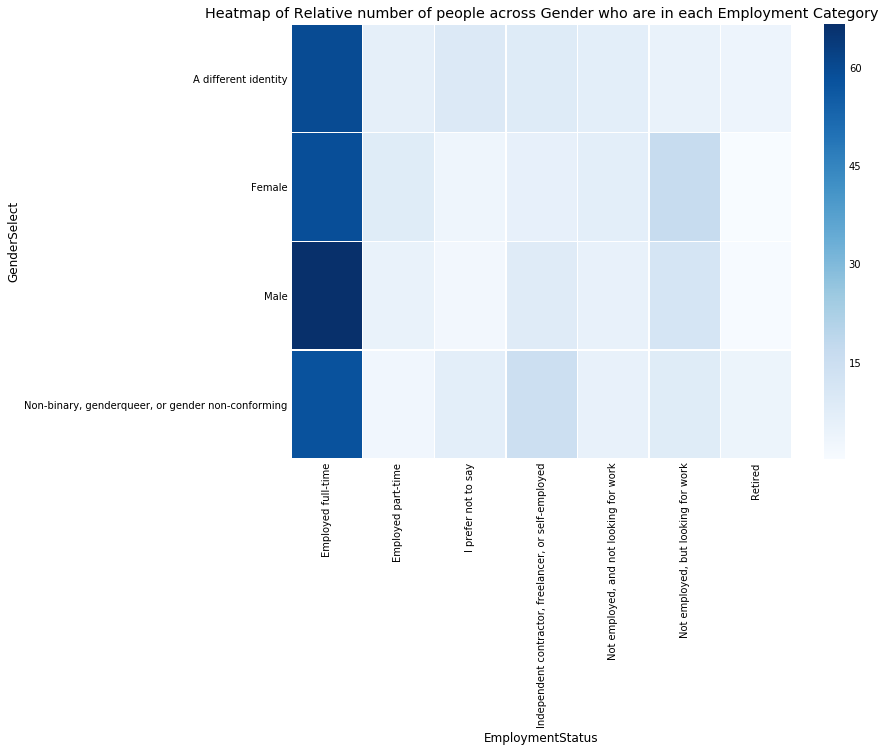

In [19]:
relative_counts_by_gender_plot = relative_counts.pivot("GenderSelect", "EmploymentStatus", "percentage")
ax = sns.heatmap(relative_counts_by_gender_plot, linewidths=.5, cmap="Blues")
plot = plt.title("Heatmap of Relative number of people across Gender who are in each Employment Category")

## What Kind of Jobs are most common amongst men and women data scientists?
- Since there are significantly more men in this sample it is expected that there will be a higher number of men in all the fields as compared to other genders
- It would be interesting to see if there are relatively more women/men in a particular field - Do women or men like to identify more with specific job titles?

In [20]:
jobs_by_gender = df[["GenderSelect", "CurrentJobTitleSelect"]].groupby([df.CurrentJobTitleSelect, df.GenderSelect]).size().reset_index(name="number")


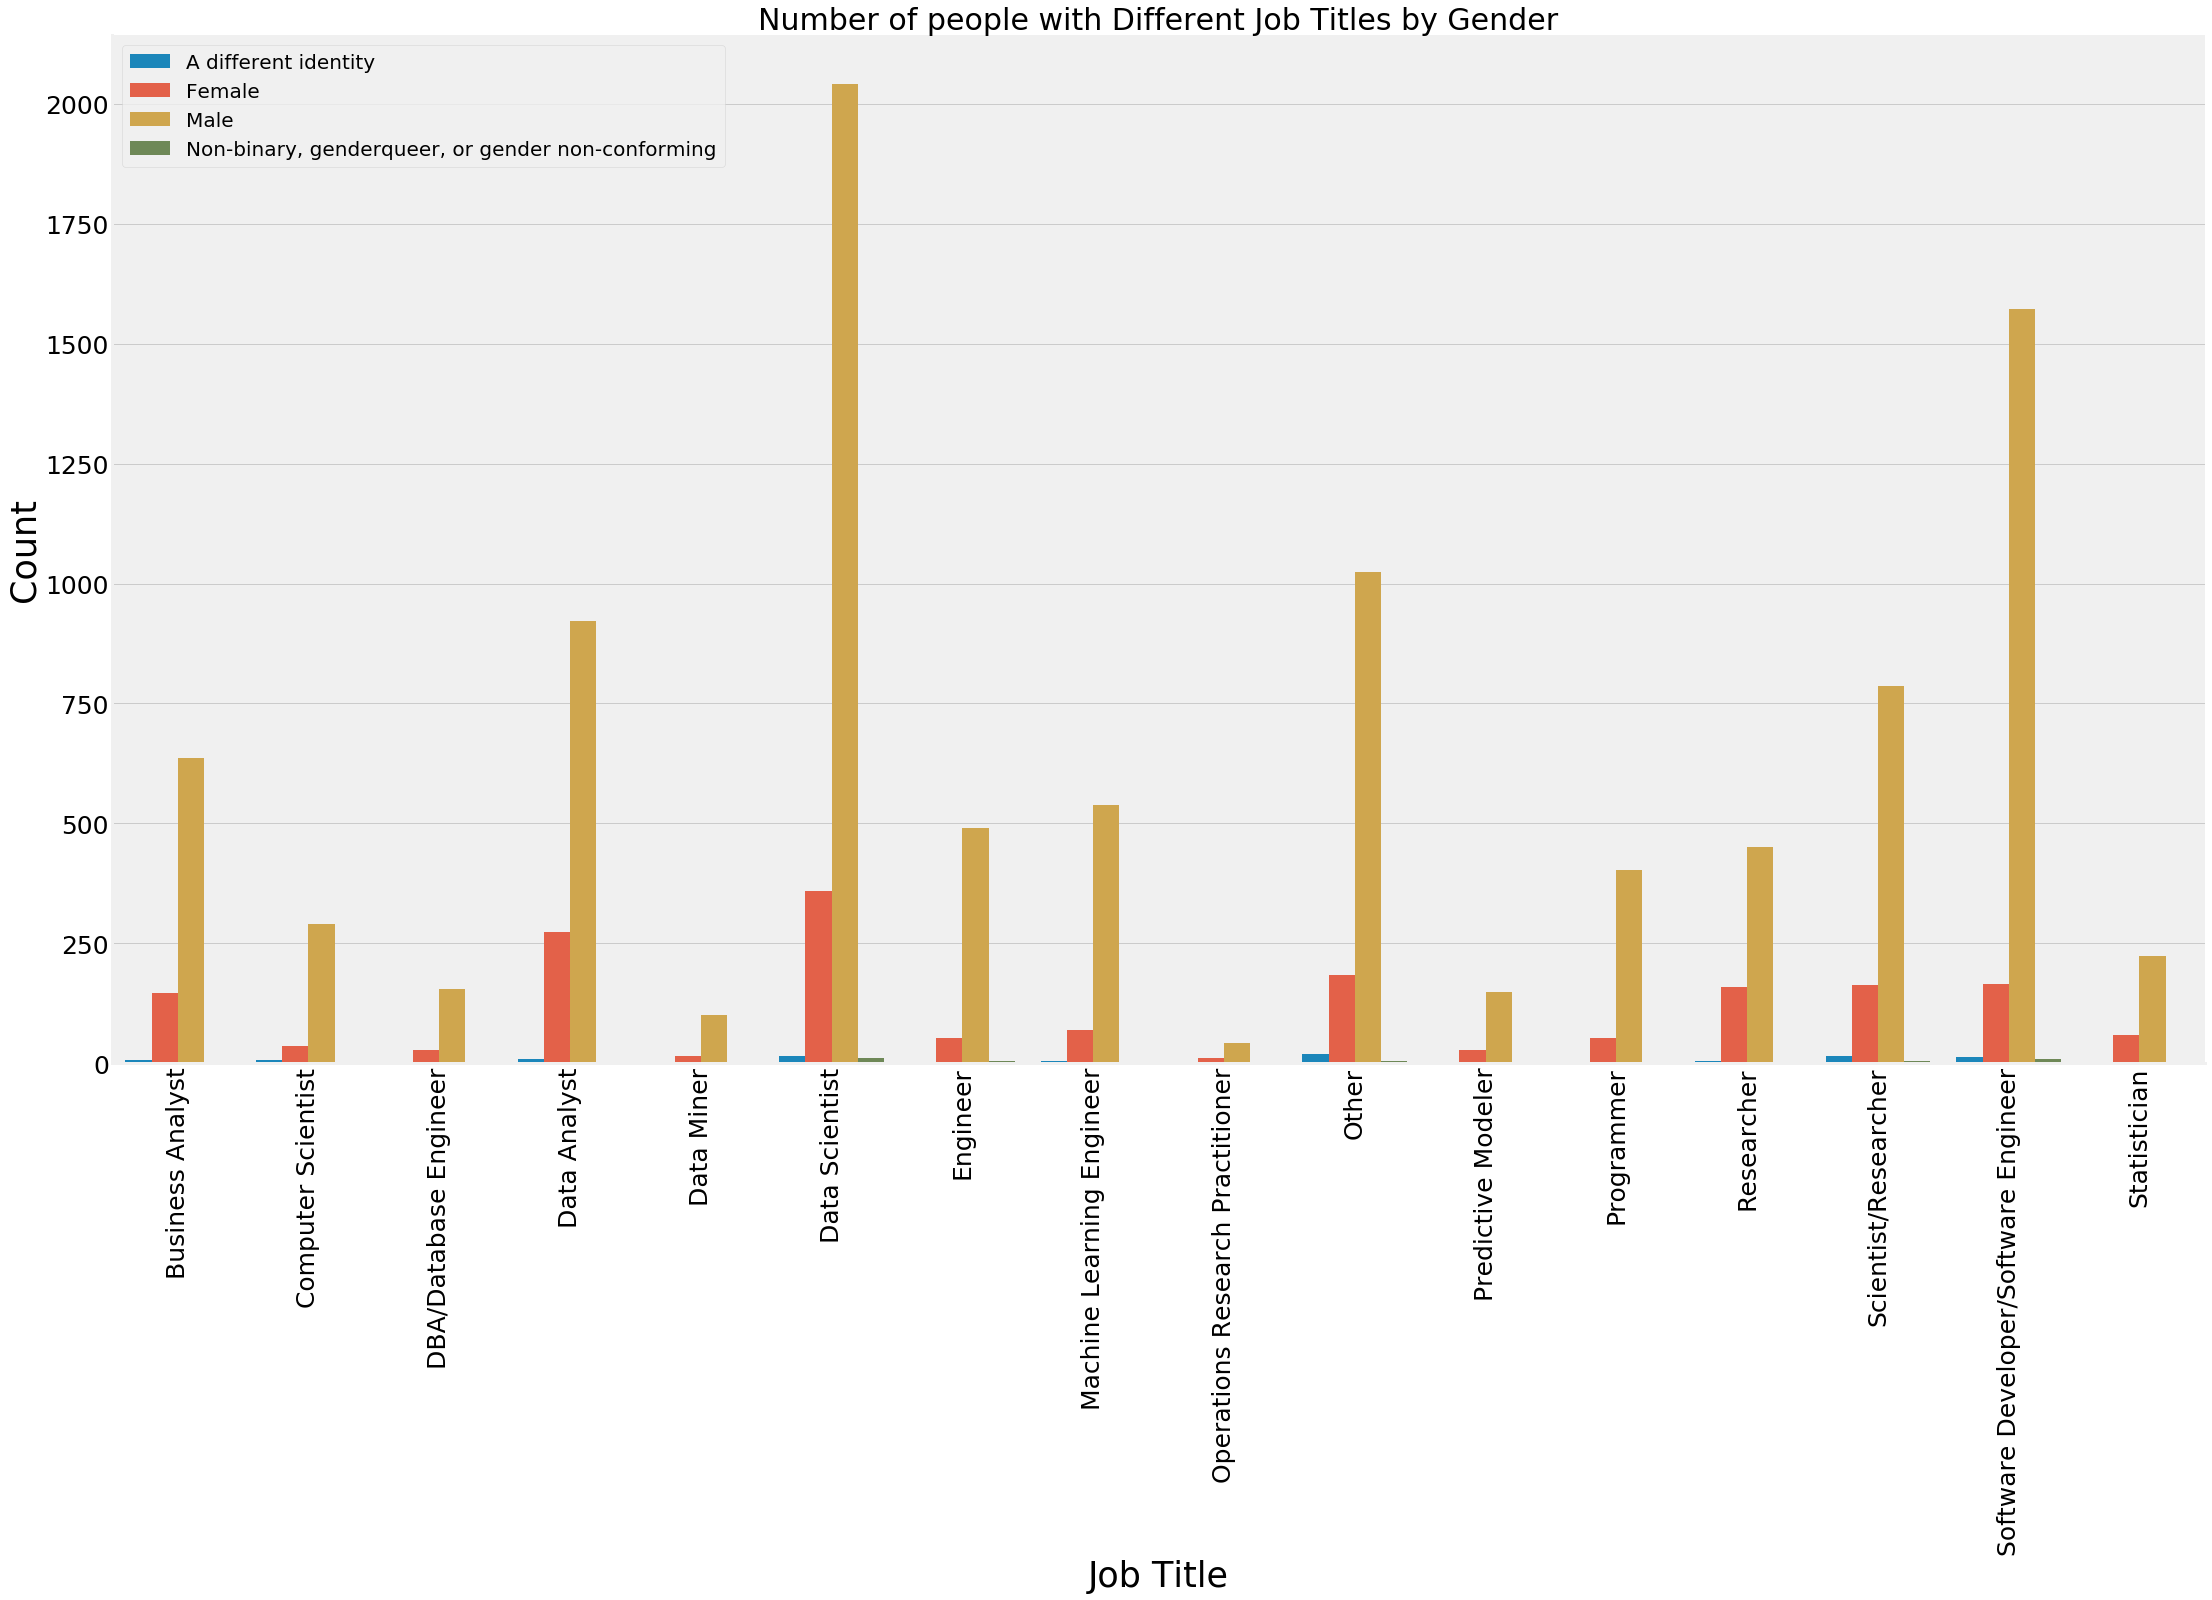

In [21]:
from matplotlib import pyplot

chart = sns.factorplot(x='CurrentJobTitleSelect', y='number', hue='GenderSelect', data=jobs_by_gender, kind='bar', size=15, aspect=2, legend=False)
for ax in plt.gcf().axes:
    ax.set_xlabel("Job Title", fontsize=35)
    ax.set_ylabel("Count", fontsize=35)

for ax in chart.axes.flatten(): 
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90, fontsize=25) 
    ax.set_yticklabels(ax.get_yticklabels(),rotation=0, fontsize=25) 

plot = plt.legend(loc='upper left',  prop={'size': 20})
plot = plt.title("Number of people with Different Job Titles by Gender", fontsize=30)

## What is the relative proportion of people with each job title by gender?
- The highest proportion of females with any job title reported is "Researcher" while the lowest proportion is "Software Developer/Software Engineer". 
- The highest proportion of Other Gender people with any job title is "Operations Research Practitioner"

In [22]:
relative_jobs_by_gender = df[["GenderSelect", "CurrentJobTitleSelect"]].groupby([df.CurrentJobTitleSelect, df.GenderSelect]).size().groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum())).reset_index(name="percentage")

In [23]:
values = relative_jobs_by_gender.groupby([relative_jobs_by_gender.CurrentJobTitleSelect, relative_jobs_by_gender.GenderSelect]).percentage.sum().unstack()
values = values[['Male', 'Female', 'A different identity', 'Non-binary, genderqueer, or gender non-conforming']]
values = values.sort_values(by=values.columns[0], axis=0)

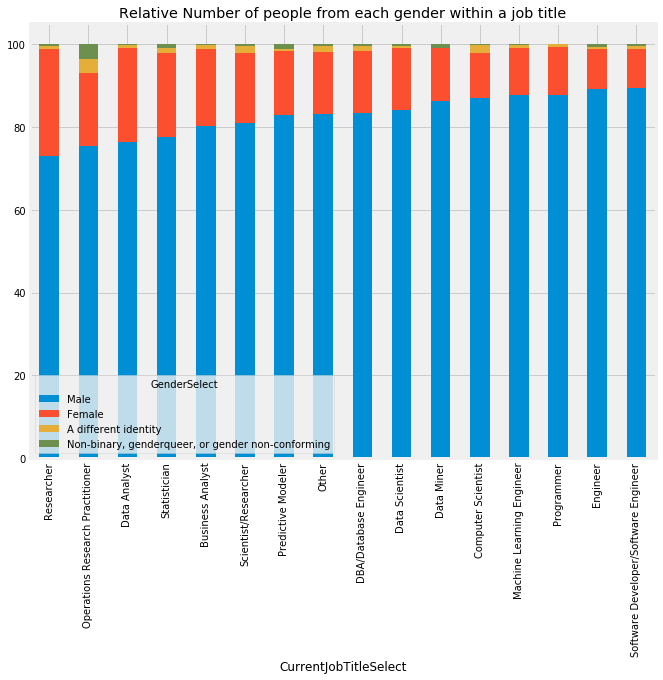

In [24]:
plot = values.plot.bar(stacked=True)
plot = plt.title("Relative Number of people from each gender within a job title")

## Income analysis by Gender

### Cleaning
- Remove commas if present and convert compensation amount to a float
- If compensation is negative, convert it to a positive value
- Multiply by the conversion rate to get the value in USD
- If not a valid string after removing commas, return Nan

In [26]:
conversion_rates = pd.read_csv("conversionRates.csv")
conversion_rates = conversion_rates.set_index("originCountry").T

In [27]:
def getConversionRate(currency):
    """
        Returns conversion rate for the given currency to USD
        If the currency is not in the conversion table assumes it is USD
        and returns 1
    """
    if currency not in conversion_rates.columns:
        return 1
    return conversion_rates[currency].exchangeRate

In [28]:
def processCompensation(row):
    compensation = row["CompensationAmount"]
    if type(compensation) == type("str"):
        try:
            result = float(compensation.replace(",", ""))
            
            if result < 0:
                result =  -result
            row["CompensationAmount"] = result * getConversionRate(row["CompensationCurrency"])
        except Exception as e:
            row["CompensationAmount"] = np.nan
    return row


In [29]:
df.CompensationAmount = df.apply(processCompensation, axis=1).CompensationAmount

### Distribution 
- Data above the first percentile and below the ninety-ninth percentile is considered
- The distribution of salary for males and females in various income brackets shows that for both males and females, the number of people holding very high salary jobs reduces as the compensation amount increases

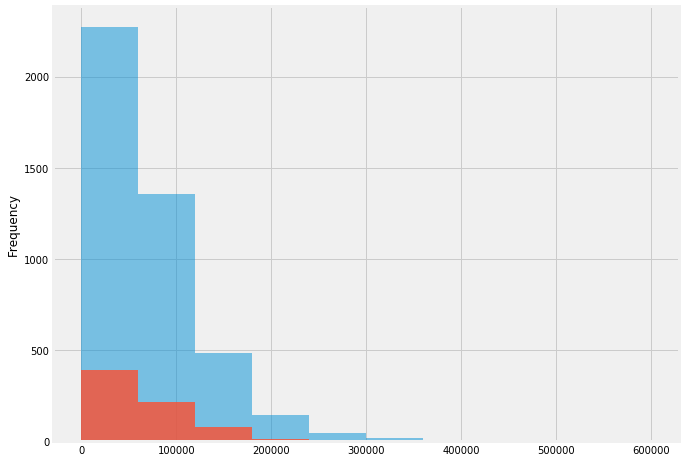

In [30]:
ninetyninth_percentile = df.CompensationAmount.quantile(0.99)
first_percentile = df.CompensationAmount.quantile(.01)
df.CompensationAmount = df[((df.CompensationAmount < ninetyninth_percentile) & (df.CompensationAmount > first_percentile))].CompensationAmount
df[df.GenderSelect == "Male"].CompensationAmount.plot.hist(bins=10, alpha=0.5)
df[df.GenderSelect == "Female"].CompensationAmount.plot.hist(bins=10, alpha=0.8)

### Median salary per age for males and females
- For each age group, the median salary for both males and females is calculated
- For many of the ages, the median salary for women is larger than that for men.
- Need to dig into this a little more and see if this is accurate or a misrepresentation of the data: other factors like country maybe playing a role here.
- Will also bin the data into age groups to see any possible relationship based on the age group rather than the exact age value

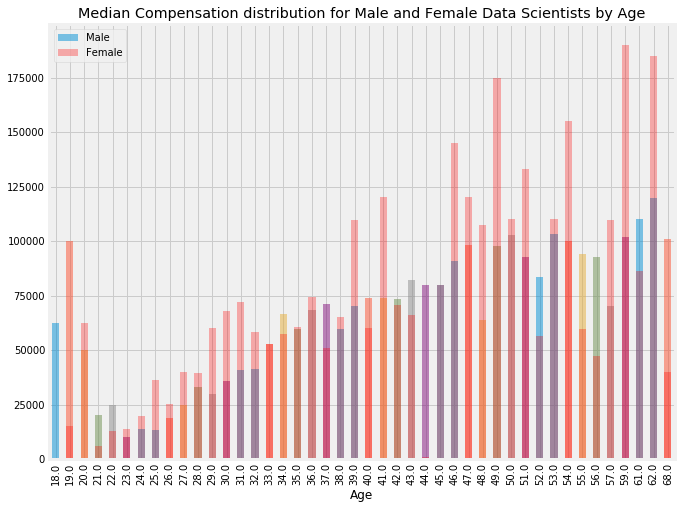

In [31]:
fig, ax = plt.subplots()
df[(df.GenderSelect == 'Male') & (df.CompensationAmount.isnull() == False ) & (df.CompensationAmount != 0.0)].groupby([df.Age]).CompensationAmount.median().plot.bar( ax=ax, alpha=0.5)
df[(df.GenderSelect == 'Female') & (df.CompensationAmount.isnull() == False) & ((df.CompensationAmount != 0.0))].groupby([df.Age]).CompensationAmount.median().plot.bar(ax=ax, alpha=0.3, color="red")

legend = ax.legend(['Male', 'Female'])
plot = plt.title("Median Compensation distribution for Male and Female Data Scientists by Age")